In [13]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px
import missingno as msno
import make_uni_df

In [14]:
uni_df = make_uni_df.get_dummied_df()
uni_df

,Participant,Studiengang,Standort,Besuch_Wirtschaftsmathematik,Geburtsjahr,Durchschnittsnote_im_Abitur,Mathematiknote_im_Abitur,LK_Deutsch,LK_Mathe,LK_Englisch,...,Mathenote_im_2_Semester,Zufriedenheit_mit_Note,Männlich,Weiblich,Divers,Single,Nicht_zusammen,Zusammen_lebend,Verheiratet,Keine_Angabe
0,53,4,21,5.0,24.0,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,1,0,0,0,0,0,0,0
1,55,4,21,6.0,19.0,3.0,3.0,0.0,1.0,0.0,...,1.3,2.0,0,1,0,0,0,1,0,0
2,56,4,21,6.0,22.0,3.3,2.8,0.0,0.0,1.0,...,NaN,NaN,0,1,0,1,0,0,0,0
3,57,16,21,8.0,21.0,2.3,3.0,1.0,0.0,0.0,...,NaN,NaN,0,1,0,0,1,0,0,0
4,58,16,21,5.0,19.0,NaN,NaN,NaN,NaN,NaN,...,1.7,3.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,23.0,2.0,2.0,0.0,0.0,1.0,...,2.0,3.0,0,1,0,0,0,0,0,0
882,1023,24,18,NaN,23.0,3.3,4.0,0.0,1.0,0.0,...,4.0,2.0,0,1,0,0,1,0,0,0
883,1024,4,18,NaN,20.0,NaN,3.0,0.0,1.0,0.0,...,3.7,3.0,1,0,0,0,0,0,0,0
884,1025,5,18,6.0,22.0,2.0,2.0,0.0,1.0,1.0,...,3.0,2.0,1,0,0,1,0,0,0,0


In [15]:
uni_df.isna().sum()

Participant                                   0
Studiengang                                   0
Standort                                      0
Besuch_Wirtschaftsmathematik                 76
Geburtsjahr                                  25
Durchschnittsnote_im_Abitur                 119
Mathematiknote_im_Abitur                    126
LK_Deutsch                                   50
LK_Mathe                                     50
LK_Englisch                                  50
Religion                                      6
Lernaufwand                                 510
Schwierigkeitsgrad                          405
Umfang                                      405
Erwartungen                                 405
Zeit_Studium                                548
Zeit_Praxispartner                          548
Zeit_Nebenjob                               548
Zeit_Hobbys                                 548
Zeit_Freizeit                               548
Zeit_Hausarbeit                         

<AxesSubplot:>

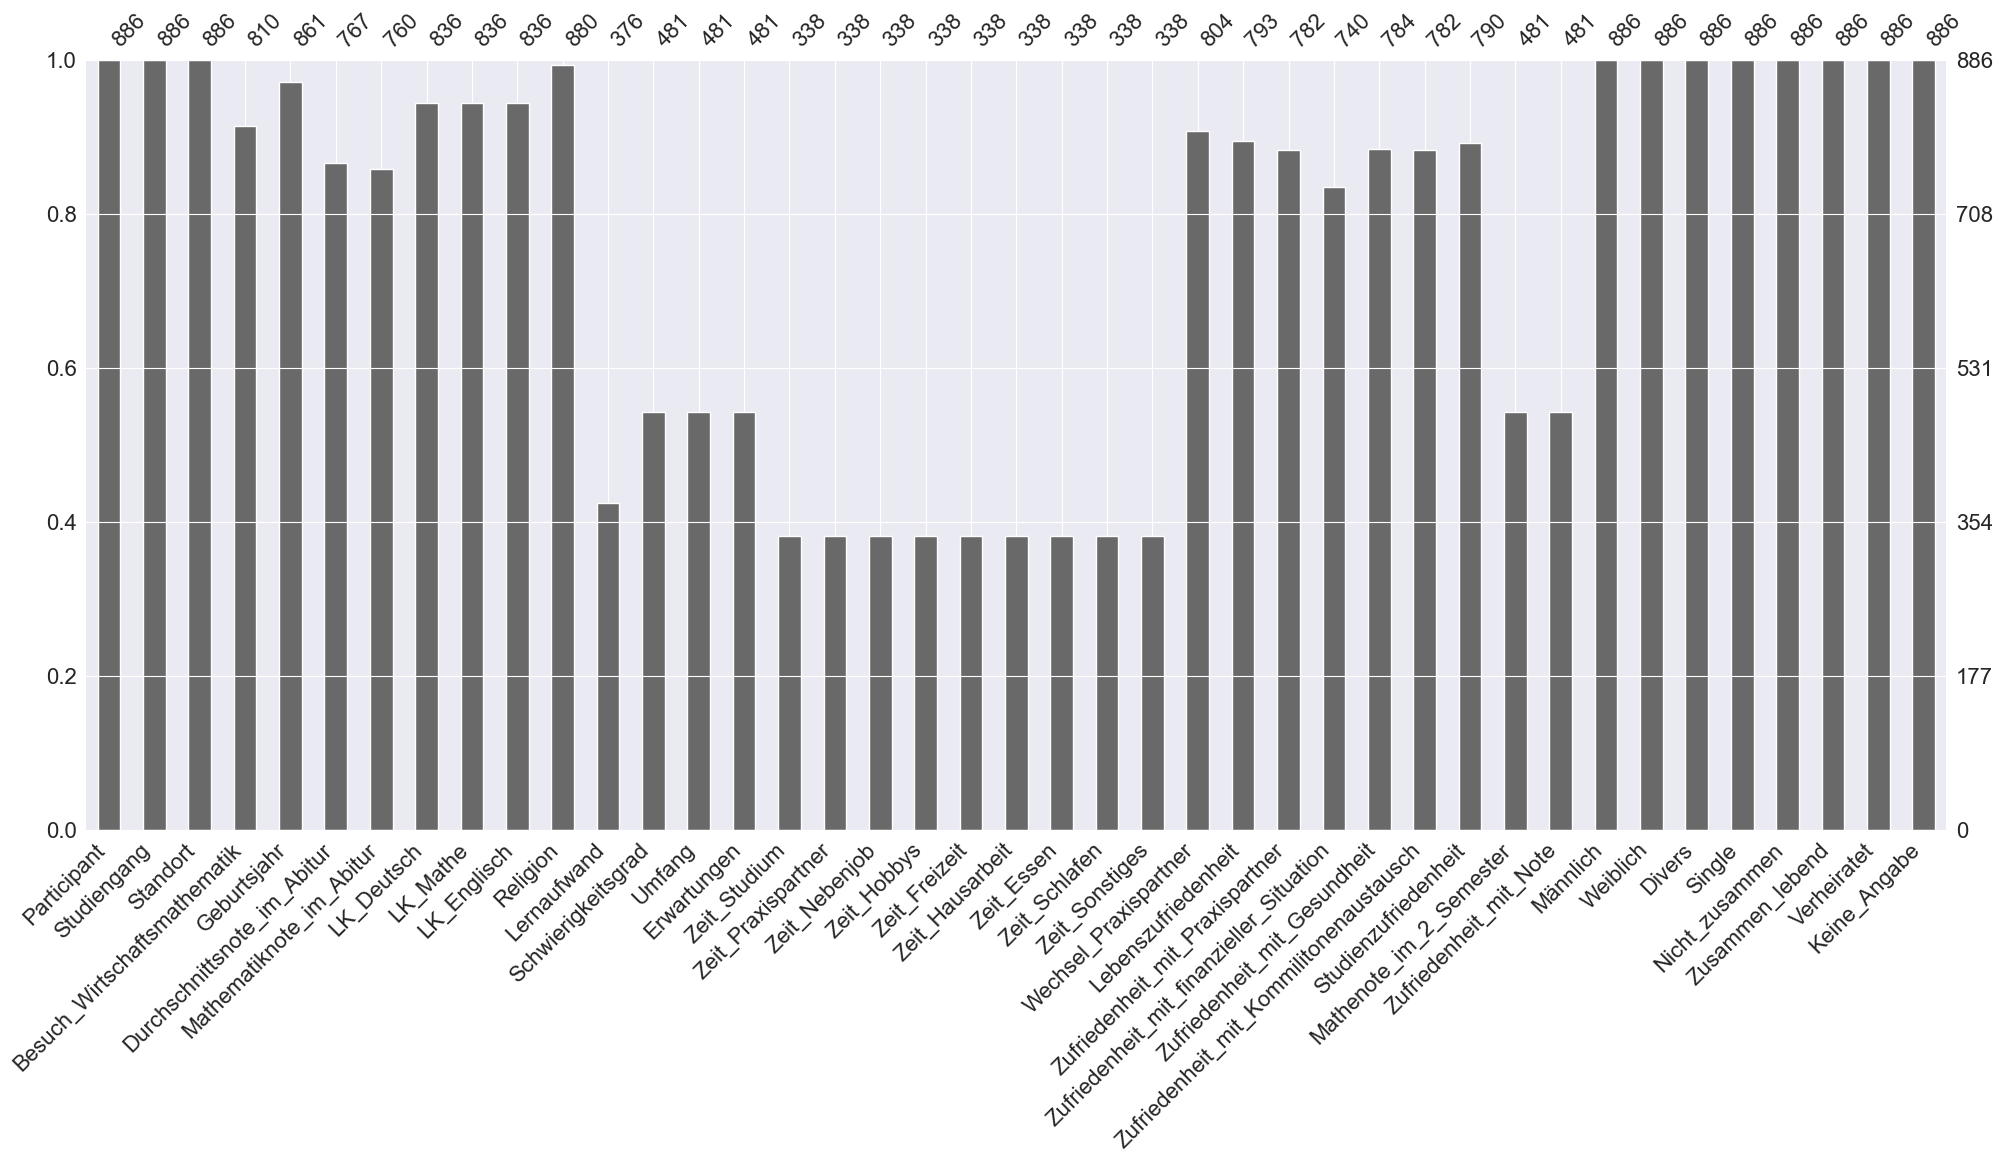

In [16]:
# Graphische Darstellung der fehlenden Werte
msno.bar(uni_df)



##2. Erstelle für diesen neuen Datensatz eine vollständige deskriptive Statistik und zeige dabei: Welche Variablen sind noch enthalten, wie sind diese ausgeprägt (Häufigkeiten / Lage- und Streuungsmaße / Boxplots & Histogramme)

                                   Variable  durchgeführter Test  \
0                      Studienzufriedenheit  Pearson-Korrelation   
1           Zufriedenheit_mit_Praxispartner  Pearson-Korrelation   
2              Zufriedenheit_mit_Gesundheit  Pearson-Korrelation   
3              Besuch_Wirtschaftsmathematik  Pearson-Korrelation   
4  Zufriedenheit_mit_finanzieller_Situation  Pearson-Korrelation   

   Ergebnis des Tests  
0        3.258900e-11  
1        6.633189e-09  
2        1.104331e-09  
3        8.111617e-01  
4        2.161339e-05  

Descriptive Statistics:
       Studienzufriedenheit  Zufriedenheit_mit_Praxispartner  \
count            280.000000                       280.000000   
mean               6.225000                         7.060714   
std                2.041527                         2.478559   
min                0.000000                         1.000000   
25%                5.000000                         6.000000   
50%                6.000000           

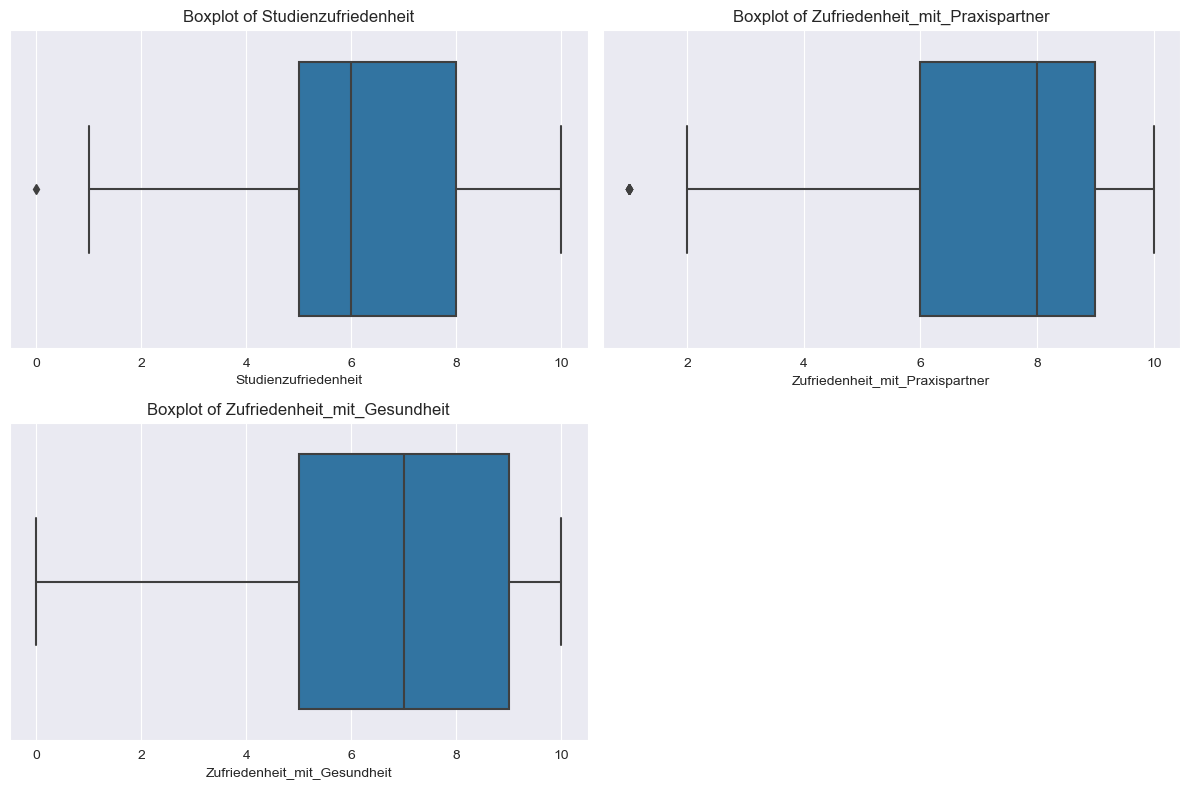

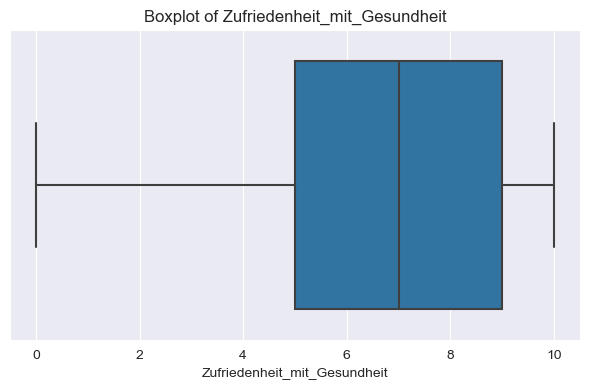

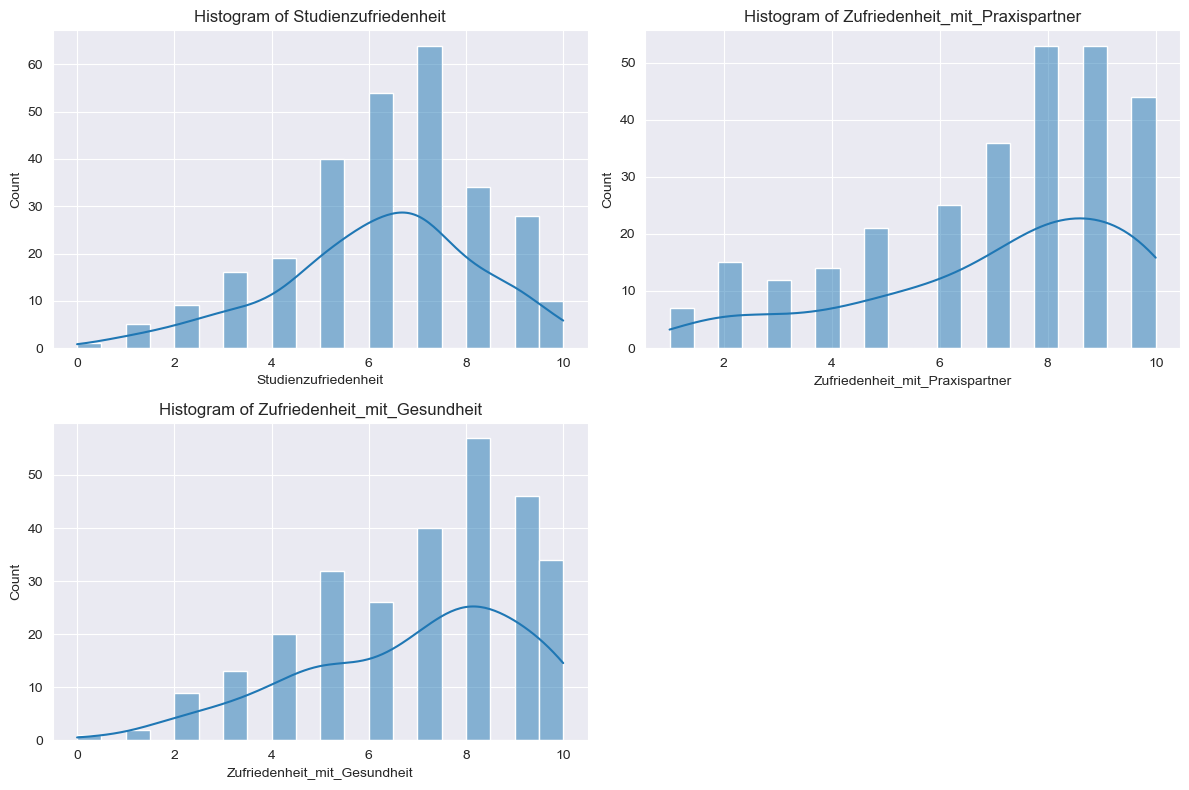

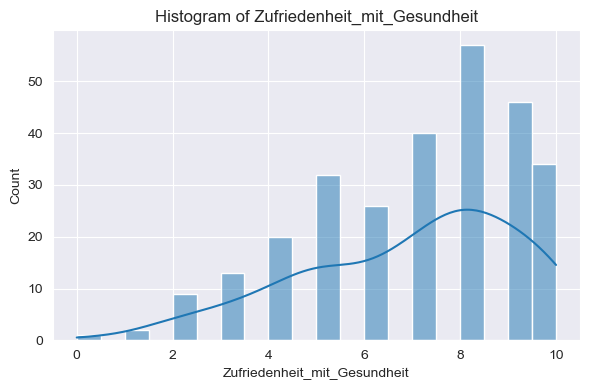

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

columns_list = uni_df.columns
columns_without_spaces = [column_name.replace(" ","_").replace("-","_").replace(".","") for column_name in columns_list]
uni_df.columns = columns_without_spaces
uni_df = uni_df[['Lebenszufriedenheit','Studienzufriedenheit','Zufriedenheit_mit_Praxispartner','Zufriedenheit_mit_Gesundheit','Besuch_Wirtschaftsmathematik','Zeit_Praxispartner','Zufriedenheit_mit_finanzieller_Situation','Zeit_Praxispartner']]
dependent_variable = 'Lebenszufriedenheit'
selected_variables = list(uni_df.columns)
selected_variables.remove('Lebenszufriedenheit')


uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):

            x = x.replace([np.inf, -np.inf], np.nan).dropna()

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=variable, data=uni_df_cleaned)
        plt.title(f"Boxplot of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
    plt.title(f"Boxplot of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
        plt.title(f"Histogram of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
    plt.title(f"Histogram of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


['Studienzufriedenheit', 'Zufriedenheit_mit_Praxispartner', 'Zufriedenheit_mit_Gesundheit', 'Besuch_Wirtschaftsmathematik', 'Zeit_Praxispartner', 'Zufriedenheit_mit_finanzieller_Situation', 'Zeit_Praxispartner']
x
1      7.0
5      8.0
7      9.0
9      5.0
13     7.0
      ... 
871    8.0
872    7.0
873    7.0
878    6.0
879    4.0
Name: Studienzufriedenheit, Length: 280, dtype: float64
y
1       5.0
5       9.0
7       8.0
9       7.0
13      8.0
       ... 
871     9.0
872     8.0
873    10.0
878     6.0
879     9.0
Name: Lebenszufriedenheit, Length: 280, dtype: float64
x
1       3.0
5      10.0
7       7.0
9       6.0
13     10.0
       ... 
871     7.0
872     8.0
873    10.0
878     8.0
879    10.0
Name: Zufriedenheit_mit_Praxispartner, Length: 280, dtype: float64
y
1       5.0
5       9.0
7       8.0
9       7.0
13      8.0
       ... 
871     9.0
872     8.0
873    10.0
878     6.0
879     9.0
Name: Lebenszufriedenheit, Length: 280, dtype: float64
x
1      5.0
5      9.0
7     

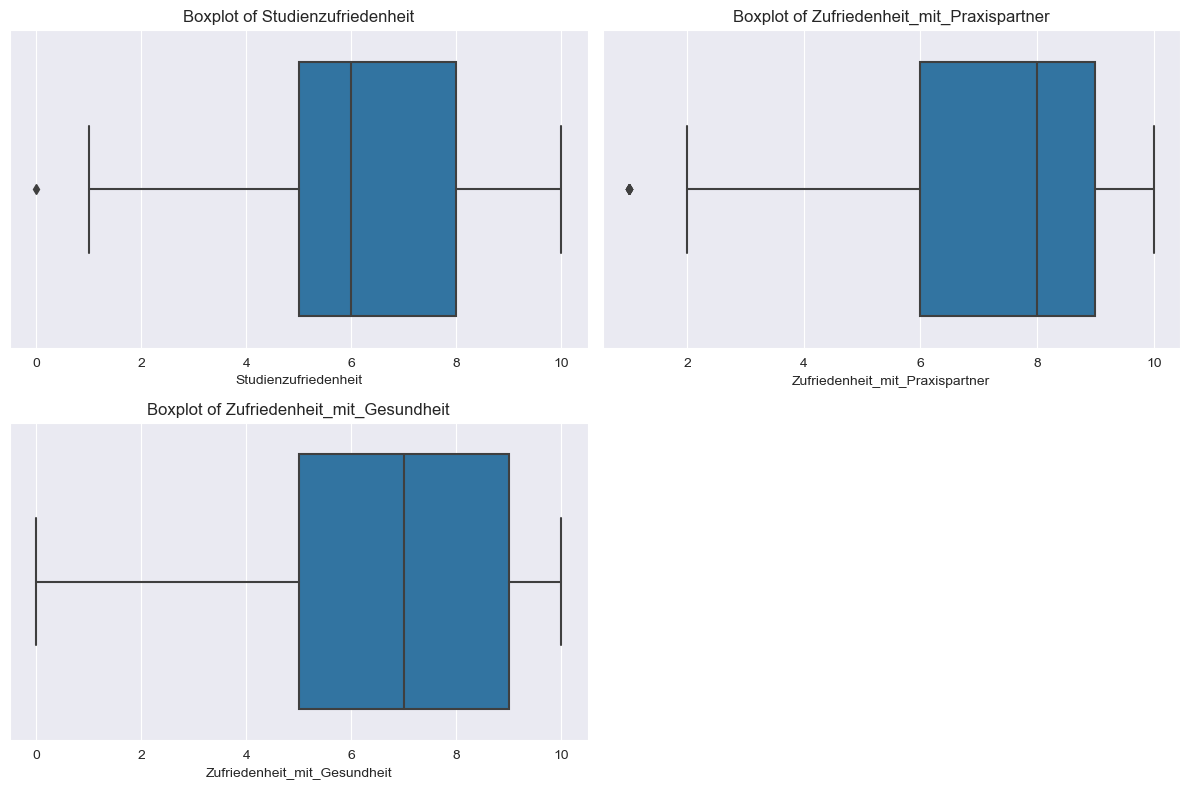

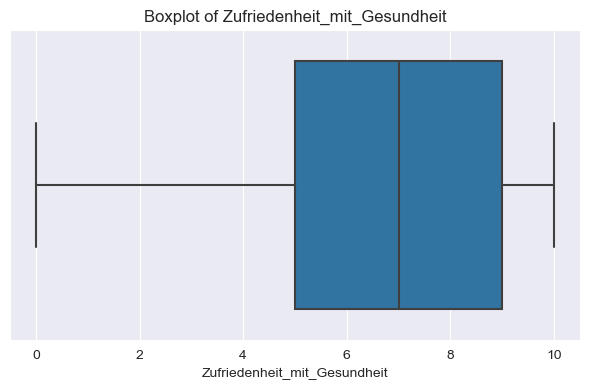

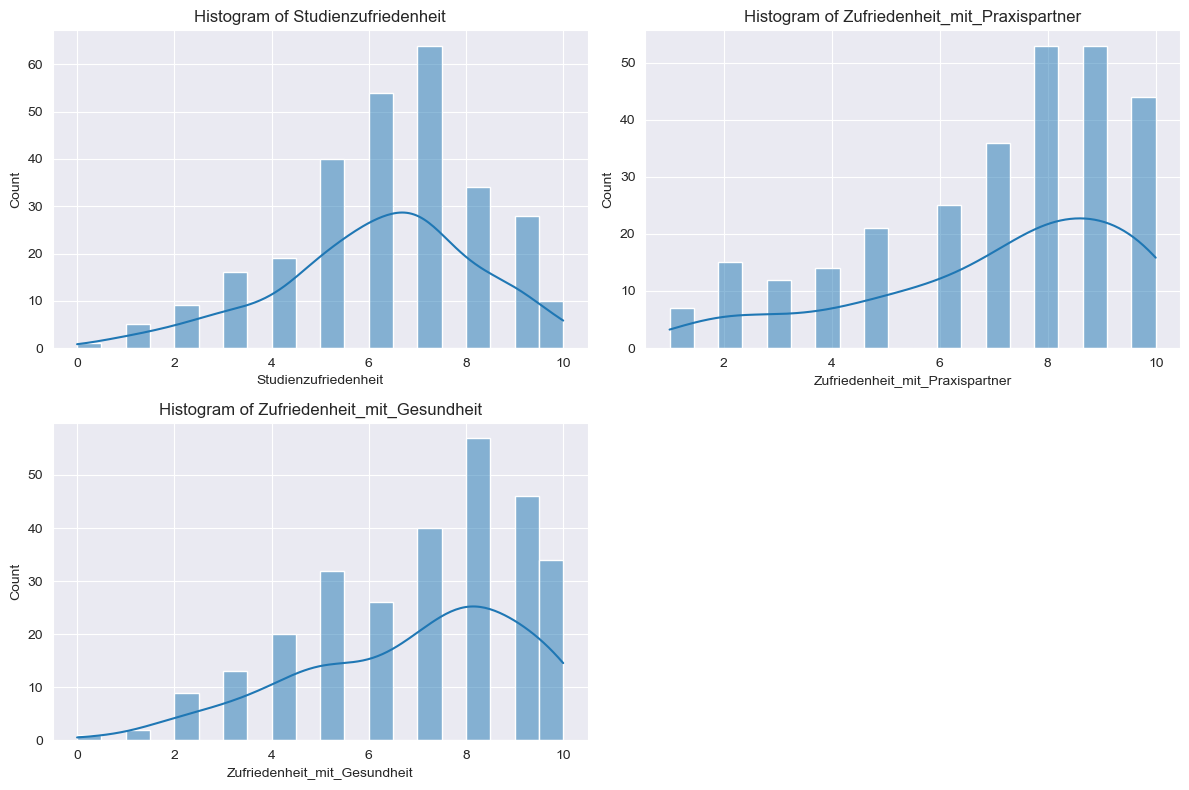

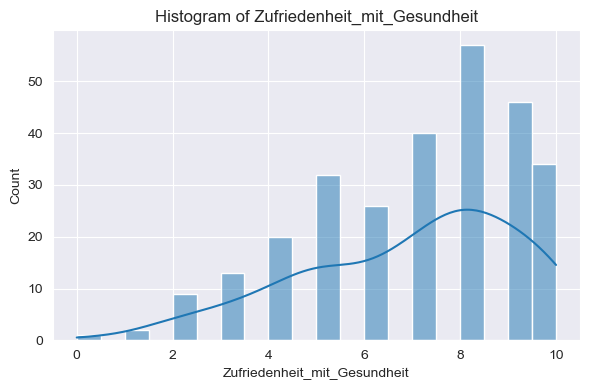

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import make_uni_df

# Read the data
uni_df = make_uni_df.get_dummied_df()
uni_df = uni_df[['Lebenszufriedenheit','Studienzufriedenheit','Zufriedenheit_mit_Praxispartner','Zufriedenheit_mit_Gesundheit','Besuch_Wirtschaftsmathematik','Zeit_Praxispartner','Zufriedenheit_mit_finanzieller_Situation','Zeit_Praxispartner']]
dependent_variable = 'Lebenszufriedenheit'
#selected_variables = ['Studienzufriedenheit', 'Beziehungsstatus', 'Zufriedenheit mit Praxispartner']
#print(type(selected_variables))
selected_variables = list(uni_df.columns)
selected_variables.remove('Lebenszufriedenheit')
print(selected_variables)

uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):

            x = x.replace([np.inf, -np.inf], np.nan).dropna()
            print("x")
            print(x)
            print("y")
            print(y)
            corr, p_value = stats.pearsonr(x, y)
            #corr = "Test"
            #p_value = 0.05
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=variable, data=uni_df_cleaned)
        plt.title(f"Boxplot of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
    plt.title(f"Boxplot of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

    # Histograms for the selected variables
    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
        plt.title(f"Histogram of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
    plt.title(f"Histogram of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

#dependent_variable = 'Lebenszufriedenheit'
#selected_variables = list(uni_df.columns)

# Step 1: Data cleaning (dropping rows with missing values in selected variables)
uni_df_cleaned = uni_df.dropna(subset=[dependent_variable] + selected_variables)

# Step 2: Handle infinite and NaN values
uni_df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
uni_df_cleaned.dropna(inplace=True)

# Step 3: Convert categorical variable 'Geschlecht' into dummy variables
#uni_df_cleaned = pd.get_dummies(uni_df_cleaned, columns=['Geschlecht'], drop_first=True)

# Check if 'Geschlecht' is present after dummy variable conversion
#if 'Geschlecht' not in uni_df_cleaned.columns:
#    uni_df_cleaned['Geschlecht'] = np.nan

# Step 4: Create the regression model
x = uni_df_cleaned[selected_variables]
y = uni_df_cleaned[dependent_variable]

X = sm.add_constant(x)  # Add a constant (for the intercepts)
model = sm.OLS(y, X).fit()

# Step 5: Interpret the results
print(model.summary())

# R^2 and adj. R^2
print("R^2:", model.rsquared)
print("Adjusted R^2:", model.rsquared_adj)

# F-statistic and p-value
print("F-statistic:", model.fvalue)
print("p-value (F-test):", model.f_pvalue)

# Interpretation of the coefficients table (as an example, the output depends on the actual variables)
print("\nCoefficients Table:")
coefficients = model.params[1:]  # Skip the first row as it is the constant
p_values = model.pvalues[1:]    # Skip the first row as it is the constant

for variable, coef, p_value in zip(selected_variables, coefficients, p_values):
    print(f"{variable}: Coefficient = {coef:.4f}, p-value = {p_value:.4f}")


                             OLS Regression Results                            
Dep. Variable:     Lebenszufriedenheit   R-squared:                       0.268
Model:                             OLS   Adj. R-squared:                  0.252
Method:                  Least Squares   F-statistic:                     16.65
Date:                 Fri, 21 Jul 2023   Prob (F-statistic):           2.33e-16
Time:                         09:25:40   Log-Likelihood:                -549.96
No. Observations:                  280   AIC:                             1114.
Df Residuals:                      273   BIC:                             1139.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

C:\Users\User\AppData\Local\Temp\ipykernel_1660\2097815367.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1660\2097815367.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df_cleaned.dropna(inplace=True)
